# **1. DATASET DE IMAGENES MNIST**

In [1]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

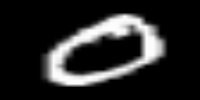

In [5]:
cv2_imshow(cv2.resize(x_train[1],(200,100)))

In [6]:
y_train[0]

5

In [7]:
x_test.shape

(10000, 28, 28)

# **2. DATASET DE CARACTERISTICAS CON HOG FEATURES**

In [8]:
img=x_train[1]
def get_hog():
  winSize=(28,28)
  blockSize=(8,8)
  blockStride=(2,2)
  cellSize=(4,4)
  nbins=9
  hog=cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
  return hog
hog=get_hog()
hog.compute(img).shape

(4356, 1)

In [9]:
def get_feature_dataset(x):
  features=[]

  for img in x:
    features.append(hog.compute(img))
  features=np.array(features)
  features=features[:,:,0]
  return features

In [10]:
features_train=get_feature_dataset(x_train)
features_test=get_feature_dataset(x_test)

In [11]:
features_train.shape

(60000, 4356)

In [12]:
features_test.shape

(10000, 4356)

# **3. DEFINICION E IMPLEMENTACION DE LA RED NEURONAL**

In [13]:
y_trainOneHot = tf.one_hot(y_train,np.max(y_train)+1)
y_testOneHot = tf.one_hot(y_test,np.max(y_train)+1)

In [14]:
y_trainOneHot[1]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classifier():
  model=Sequential()
  model.add(Dense(200,input_dim=features_train.shape[1],activation='relu'))
  model.add(Dense(180,activation='relu'))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
  return model

In [16]:
model=classifier()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               871400    
                                                                 
 dense_1 (Dense)             (None, 180)               36180     
                                                                 
 dense_2 (Dense)             (None, 150)               27150     
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 936,240
Trainable params: 936,240
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(features_train,y_trainOneHot,epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 5s 5ms/step - loss: 2.2142
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 1.8896
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 1.3558
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.8396
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.5425
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3932
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3113
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2612
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2279
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2041


In [18]:
prediction_train=model.predict(features_train)
prediction_test=model.predict(features_test)

In [19]:
prediction_train.shape

(60000, 10)

In [20]:
prediction_train[0]

array([1.5983099e-04, 7.9457510e-05, 2.6251206e-03, 4.1130954e-01,
       2.3883618e-04, 5.7495278e-01, 2.9936750e-04, 6.3026813e-04,
       9.4058961e-03, 2.9891287e-04], dtype=float32)

In [24]:
y_pred_train=np.argmax(prediction_train,1)
y_pred_test=np.argmax(prediction_test,1)

In [25]:
y_pred_train

array([5, 0, 4, ..., 5, 6, 8])

In [26]:
errorTrain= 100*np.sum(y_pred_train != y_train)/len(y_train)
errorTest= 100*np.sum(y_pred_test != y_test)/len(y_test)

In [28]:
print("error entrenamiento es : {}%".format(errorTrain))
print("error prueba es : {}%".format(errorTest))

error entrenamiento es : 4.4816666666666665%
error prueba es : 4.01%


# **4. CALCULO DE LA MATRIZ DE CONFUSION**

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
conf_mat= confusion_matrix(y_test,y_pred_test)

In [34]:
disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat)

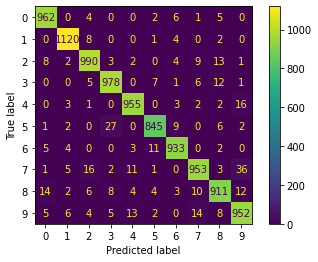

In [35]:
disp.plot()

In [37]:
conf_mat_norm=np.round(100*conf_mat/np.sum(conf_mat,1),1)

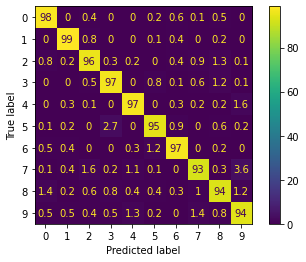

In [38]:
disp2=ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm)
disp2.plot()